In [10]:
#Load in the Libraries
library(dplyr)
library(ggplot2)
library(lubridate)
library(reshape2)
library(scales)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



Let us load in the datasets and exxamine the structure of the dataset

In [6]:
#Load in the datasets
sales_train <- read.csv("sales_train_v2.csv", header = T, sep = ",")
items <- read.csv("items.csv", header = T, sep = ",")

#Examine structure
str(sales_train)
str(items)

'data.frame':	2935849 obs. of  6 variables:
 $ date          : Factor w/ 1034 levels "01.01.2013","01.01.2014",..: 35 69 137 171 477 307 35 103 341 69 ...
 $ date_block_num: int  0 0 0 0 0 0 0 0 0 0 ...
 $ shop_id       : int  59 25 25 25 25 25 25 25 25 25 ...
 $ item_id       : int  22154 2552 2552 2554 2555 2564 2565 2572 2572 2573 ...
 $ item_price    : num  999 899 899 1709 1099 ...
 $ item_cnt_day  : num  1 1 -1 1 1 1 1 1 1 3 ...
'data.frame':	22170 obs. of  3 variables:
 $ item_name       : Factor w/ 22170 levels "! Ð’Ðž Ð’Ð›Ð\220Ð¡Ð¢Ð\230 Ð\235Ð\220Ð’Ð\220Ð–Ð”Ð•Ð\235Ð\230Ð¯ (ÐŸÐ›Ð\220Ð¡Ð¢.)         D",..: 1 2 4 5 10 9 7 6 8 3 ...
 $ item_id         : int  0 1 2 3 4 5 6 7 8 9 ...
 $ item_category_id: int  40 76 40 40 40 40 40 40 40 40 ...


Let us join both data, we will be using a left join. You'd discover that both dataframes have item_id in common, LEFT JOIN keyword returns all records from the left table (table1), and the matched records from the right table (table2).

In [11]:
#Lets work with the above data first
sale_item_join <- sales_train %>% 
  left_join(items, by = "item_id")

#Fill name with null
sale_item_join$item_name <- NULL #We do not need the item name as each item has its own id and category
str(sale_item_join)


'data.frame':	2935849 obs. of  7 variables:
 $ date            : Factor w/ 1034 levels "01.01.2013","01.01.2014",..: 35 69 137 171 477 307 35 103 341 69 ...
 $ date_block_num  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ shop_id         : int  59 25 25 25 25 25 25 25 25 25 ...
 $ item_id         : int  22154 2552 2552 2554 2555 2564 2565 2572 2572 2573 ...
 $ item_price      : num  999 899 899 1709 1099 ...
 $ item_cnt_day    : num  1 1 -1 1 1 1 1 1 1 3 ...
 $ item_category_id: int  37 58 58 58 56 59 56 55 55 55 ...


In [12]:
#Remove the other datasets no longer needed
#rm("items", "sales_train")
#convert date column to date class
#use dmy from lubridate data
sale_item_join$date <- dmy(sale_item_join$date)

In [13]:
#Lets apply lubridate functions to create year day and month columns
sale_item_join$year <- year(sale_item_join$date)
sale_item_join$month <- month(sale_item_join$date)
sale_item_join$day <- day(sale_item_join$date)
sale_item_join$weekday <- weekdays(sale_item_join$date)


#lets convert year and weekday to factor
sale_item_join$year <- as.factor(sale_item_join$year)
sale_item_join$weekday <- as.factor(sale_item_join$weekday)

Now let us try and have a monthly count of individual products sold in individual stores over the period of study

In [14]:
#Lets examine how many products are sold monthly
monthly_count <- sale_item_join %>% 
  group_by(year, month, shop_id, item_id) %>% 
  summarise(item_count_month = sum(item_cnt_day)) %>% 
  ungroup()

#Left join monthly_count with sale_item_join
summary_data <- sale_item_join %>% 
  left_join(monthly_count, by = c("year", "month", "shop_id", "item_id"))

str(summary_data)
summary(summary_data) #we now have a monthly sale column as well as a daily sale column

'data.frame':	2935849 obs. of  12 variables:
 $ date            : Date, format: "2013-01-02" "2013-01-03" ...
 $ date_block_num  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ shop_id         : int  59 25 25 25 25 25 25 25 25 25 ...
 $ item_id         : int  22154 2552 2552 2554 2555 2564 2565 2572 2572 2573 ...
 $ item_price      : num  999 899 899 1709 1099 ...
 $ item_cnt_day    : num  1 1 -1 1 1 1 1 1 1 3 ...
 $ item_category_id: int  37 58 58 58 56 59 56 55 55 55 ...
 $ year            : Factor w/ 3 levels "2013","2014",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ month           : num  1 1 1 1 1 1 1 1 1 1 ...
 $ day             : int  2 3 5 6 15 10 2 4 11 3 ...
 $ weekday         : Factor w/ 7 levels "Friday","Monday",..: 7 5 3 4 6 5 7 1 1 5 ...
 $ item_count_month: num  1 0 0 1 1 1 1 2 2 3 ...


      date            date_block_num     shop_id      item_id     
 Min.   :2013-01-01   Min.   : 0.00   Min.   : 0   Min.   :    0  
 1st Qu.:2013-08-01   1st Qu.: 7.00   1st Qu.:22   1st Qu.: 4476  
 Median :2014-03-04   Median :14.00   Median :31   Median : 9343  
 Mean   :2014-04-03   Mean   :14.57   Mean   :33   Mean   :10197  
 3rd Qu.:2014-12-05   3rd Qu.:23.00   3rd Qu.:47   3rd Qu.:15684  
 Max.   :2015-10-31   Max.   :33.00   Max.   :59   Max.   :22169  
                                                                  
   item_price        item_cnt_day      item_category_id   year        
 Min.   :    -1.0   Min.   : -22.000   Min.   : 0       2013:1267562  
 1st Qu.:   249.0   1st Qu.:   1.000   1st Qu.:28       2014:1055861  
 Median :   399.0   Median :   1.000   Median :40       2015: 612426  
 Mean   :   890.9   Mean   :   1.243   Mean   :40                     
 3rd Qu.:   999.0   3rd Qu.:   1.000   3rd Qu.:55                     
 Max.   :307980.0   Max.   :2169.000  

In [15]:
#lets examine if there are missing values
colSums(is.na(summary_data))
#There are no missing values

#examine for null data
is.null(summary_data)


date   date_block_num          shop_id          item_id 
               0                0                0                0 
      item_price     item_cnt_day item_category_id             year 
               0                0                0                0 
           month              day          weekday item_count_month 
               0                0                0                0

[1] FALSE

#### EXPLORATORY DATA ANALYSIS

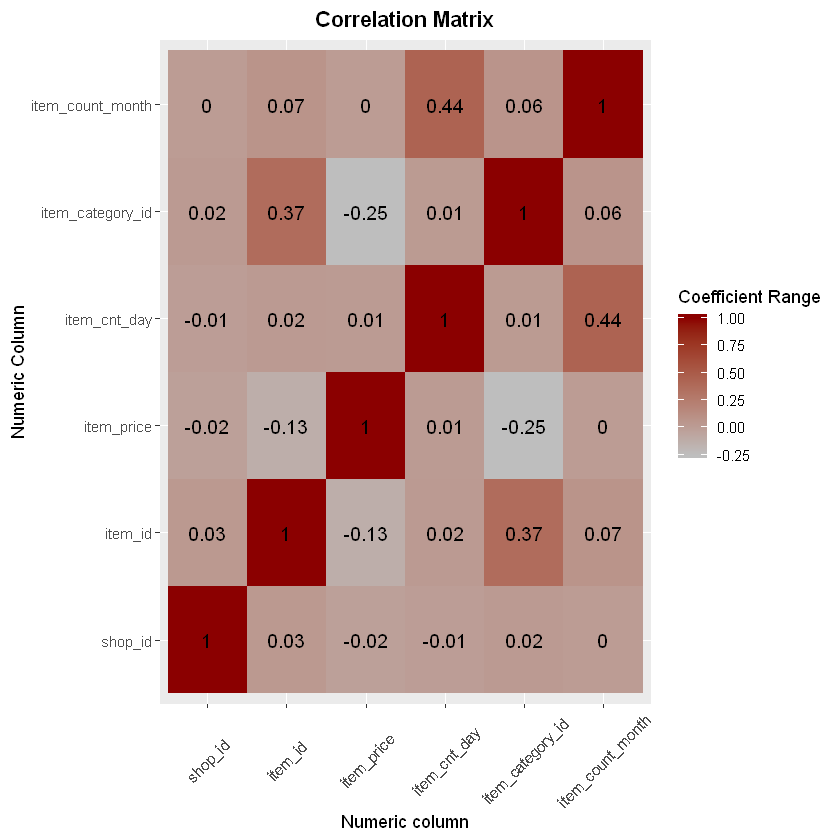

In [16]:
#correlation matrix for all numeric columns
cor_data <- summary_data %>% 
  select(3:7, 12)

melt(cor(cor_data)) %>% 
  ggplot(., aes(Var1, Var2, fill = value)) +
  geom_tile() +
  scale_fill_gradient(low = "grey", high = "darkred") +
  geom_text(aes(Var1, Var2, label = round(value,2)), size = 4) +
  labs(title = "Correlation Matrix", x = "Numeric column", y = "Numeric Column",
       fill = "Coefficient Range") +
  theme(axis.text.x = element_text(vjust = 0.5, angle = 45),
        plot.title = element_text(face = "bold", hjust = 0.5))


In [18]:
#How many distinct shops do we have
summary_data %>% 
  select(shop_id) %>% distinct() %>% 
  count()

#Lets examine the amount of unique Item from various shops
summary_data %>% 
  select(item_id) %>% 
  distinct() %>% 
  count()

n
60


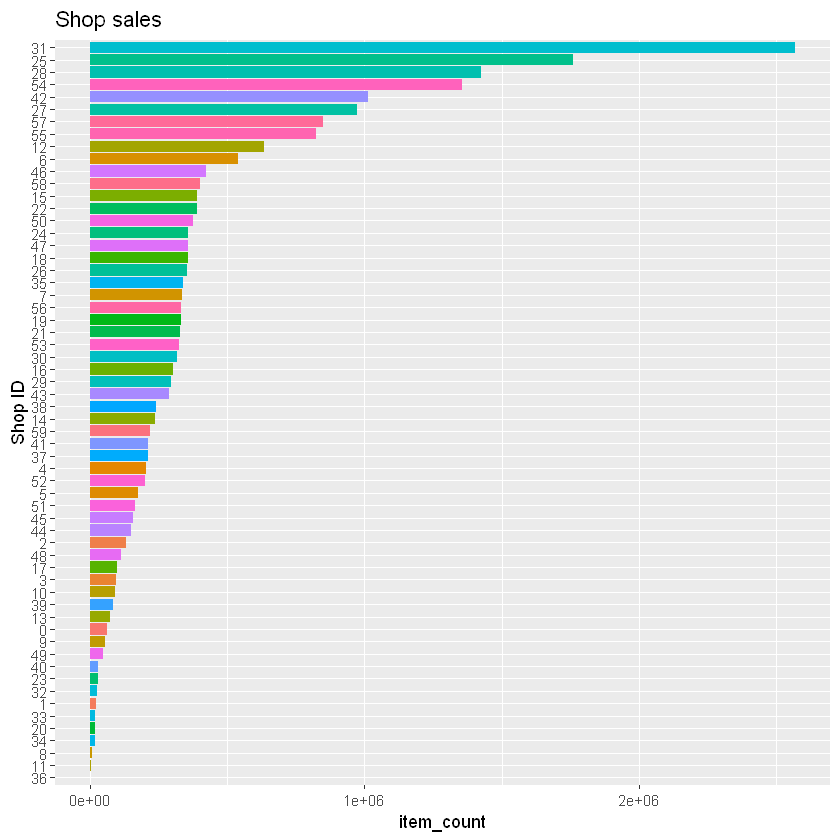

In [17]:
#Examine the most popular shops and total sales of the shop
summary_data %>% 
  group_by(shop_id) %>% 
  summarise(item_count = sum(item_count_month)) %>% 
  ggplot(., aes(reorder(as.factor(shop_id), item_count), item_count, fill = as.factor(shop_id))) +
  geom_bar(stat = "identity", show.legend = F) +
  coord_flip() + 
  labs(title = "Shop sales", x = "Shop ID", ylab = "Item Count")

In [ ]:
#Which shop has the most item in their shop
summary_data %>% 
  group_by(shop_id) %>% 
  summarise(item_count = n_distinct(item_id)) %>% 
  ggplot(.,aes(reorder(as.factor(shop_id), item_count), item_count, fill = as.factor(shop_id))) +
  geom_bar(stat = "identity", show.legend = F) +
  coord_flip() + 
  labs(title = "most Items Available at a shop", x = "Shop ID", ylab = "Item Count")


In [ ]:
#What are the day and month wise sales
summary_data %>% 
  group_by(month, day) %>% 
  summarise(sales = sum(item_cnt_day*item_price)) %>% 
  ungroup() %>% 
  ggplot(.,aes(factor(day), sales, col = factor(month))) +
  geom_line(aes(group = month)) + geom_point() +
  labs(title = "Day - Month sales", fill = "Month")

In [ ]:
#Percentage of items sold daily
summary_data %>% 
  group_by(date_block_num) %>% 
  summarise(monthly_sales_freq = round(sum(item_cnt_day)/items_sold, 3)) %>% 
  ungroup() %>% 
  ggplot(.,aes(x = "", y = monthly_sales_freq, fill = factor(date_block_num))) +
  geom_bar(width = 1, stat = "identity") +
  coord_polar(theta = "y", start = 0) +
  geom_col(position = "fill") + 
  geom_label(aes(label = paste0(monthly_sales_freq *100, "%")), position = 
               position_fill(vjust = 0.5)) +
  labs(x = "", y = "Monthly Item Frequency Sales", fill =  "Months",
       title = "% of Items sold monthly")
